In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from config import census_api_key
import gmaps
from config import gkey
c = Census(census_api_key)
gmaps.configure(api_key=gkey)

# Median Household Income over 10 years in US

In [2]:
income_2009 = c.acs5.get(("NAME","B19019_001E"),{'for':'state:*'},year =2009)
income_2009 = pd.DataFrame(income_2009)
income_2010 = c.acs5.get(("NAME","B19019_001E"),{'for':'state:*'},year =2010)
income_2010 = pd.DataFrame(income_2010)
income_2011 = c.acs5.get(("NAME","B19019_001E"),{'for':'state:*'},year =2011)
income_2011 = pd.DataFrame(income_2011)
income_2012 = c.acs5.get(("NAME","B19019_001E"),{'for':'state:*'},year =2012)
income_2012 = pd.DataFrame(income_2012)
income_2013 = c.acs5.get(("NAME","B19019_001E"),{'for':'state:*'},year =2013)
income_2013 = pd.DataFrame(income_2013)
income_2014 = c.acs5.get(("NAME","B19019_001E"),{'for':'state:*'},year =2014)
income_2014 = pd.DataFrame(income_2014)
income_2015 = c.acs5.get(("NAME","B19019_001E"),{'for':'state:*'},year =2015)
income_2015 = pd.DataFrame(income_2015)
income_2016 = c.acs5.get(("NAME","B19019_001E"),{'for':'state:*'},year =2016)
income_2016 = pd.DataFrame(income_2016)
income_2017 = c.acs5.get(("NAME","B19019_001E"),{'for':'state:*'},year =2017)
income_2017 = pd.DataFrame(income_2017)
income_2018 = c.acs5.get(("NAME","B19019_001E"),{'for':'state:*'},year =2018)
income_2018 = pd.DataFrame(income_2018)

In [3]:
# Convert to DataFrame
income_2009 = income_2009.rename(columns={"B19019_001E": "Median Earnings-2009","NAME": "Name","state": "State"})
income_2010 = income_2010.rename(columns={"B19019_001E": "Median Earnings-2010","NAME": "Name","state": "State"})
income_2011 = income_2011.rename(columns={"B19019_001E": "Median Earnings-2011","NAME": "Name","state": "State"})
income_2012 = income_2012.rename(columns={"B19019_001E": "Median Earnings-2012","NAME": "Name","state": "State"})
income_2013 = income_2013.rename(columns={"B19019_001E": "Median Earnings-2013","NAME": "Name","state": "State"})
income_2014 = income_2014.rename(columns={"B19019_001E": "Median Earnings-2014","NAME": "Name","state": "State"})
income_2015 = income_2015.rename(columns={"B19019_001E": "Median Earnings-2015","NAME": "Name","state": "State"})
income_2016 = income_2016.rename(columns={"B19019_001E": "Median Earnings-2016","NAME": "Name","state": "State"})
income_2017 = income_2017.rename(columns={"B19019_001E": "Median Earnings-2017","NAME": "Name","state": "State"})
income_2018 = income_2018.rename(columns={"B19019_001E": "Median Earnings-2018","NAME": "Name","state": "State"})
all_income_years = pd.merge(income_2009, income_2010, how='right', on=['State','Name'])
all_income_years = pd.merge(all_income_years, income_2011, how='right', on=['State','Name'])
all_income_years = pd.merge(all_income_years, income_2012, how='right', on=['State','Name'])
all_income_years = pd.merge(all_income_years, income_2013, how='right', on=['State','Name'])
all_income_years = pd.merge(all_income_years, income_2014, how='right', on=['State','Name'])
all_income_years = pd.merge(all_income_years, income_2015, how='right', on=['State','Name'])
all_income_years = pd.merge(all_income_years, income_2016, how='right', on=['State','Name'])
all_income_years = pd.merge(all_income_years, income_2017, how='right', on=['State','Name'])
all_income_years = pd.merge(all_income_years, income_2018, how='right', on=['State','Name'])
all_income_years.set_index('Name')
all_income_years.head()

,Name,Median Earnings-2009,State,Median Earnings-2010,Median Earnings-2011,Median Earnings-2012,Median Earnings-2013,Median Earnings-2014,Median Earnings-2015,Median Earnings-2016,Median Earnings-2017,Median Earnings-2018
0,Alaska,64635.0,02,66521.0,69014.0,69917.0,70760.0,71829.0,72515.0,74444.0,76114.0,76715.0
1,Alabama,41216.0,01,42081.0,42934.0,43160.0,43253.0,43511.0,43623.0,44758.0,46472.0,48486.0
2,Arkansas,38542.0,05,39267.0,40149.0,40531.0,40768.0,41264.0,41371.0,42336.0,43813.0,45726.0
3,Arizona,50296.0,04,50448.0,50752.0,50256.0,49774.0,49928.0,50255.0,51340.0,53510.0,56213.0
4,California,60392.0,06,60883.0,61632.0,61400.0,61094.0,61489.0,61818.0,63783.0,67169.0,71228.0


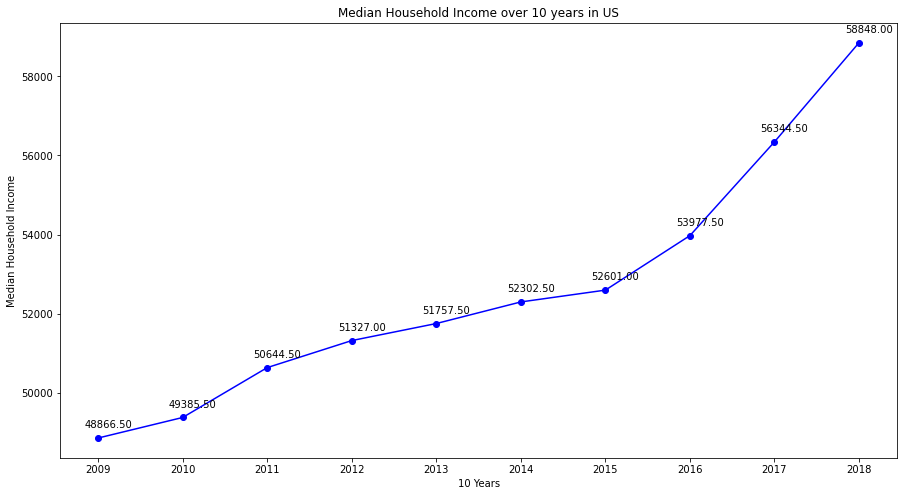

In [4]:
y_axis = list(all_income_years.median())
x_axis = ["2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]
plt.figure(figsize=(15,8))
plt.plot(x_axis, y_axis, color="blue", marker ='o')

#plt.figure(figsize=(20,10))
for x,y in zip(x_axis,y_axis):

    label = "{:.2f}".format(y)

    plt.annotate(label, (x,y), textcoords="offset points", xytext=(10,10), ha='center') 

plt.title("Median Household Income over 10 years in US")
plt.xlabel("10 Years")
plt.ylabel("Median Household Income")
plt.savefig("MedianHouseholdover10years.png")
plt.show()

# Income vs. Education in California

In [5]:
education_inc_data = c.acs5.get(("NAME","B01003_001E","B19001_001E","B20004_001E","B20004_002E","B20004_003E",
                          "B20004_004E","B20004_005E","B20004_006E"),{'for':'county:*'})
# Convert to DataFrame
education_inc_data = pd.DataFrame(education_inc_data)

# Column Reordering
education_inc_data = education_inc_data.rename(columns={"B01003_001E": "Population",
                                                        "B19001_001E": "Household Income",
                                                        "B20004_001E": "Median Earnings",
                                                        "B20004_002E": "Less than high school graduate",
                                                        "B20004_003E": "High school graduate",
                                                        "B20004_004E": "Some college",
                                                        "B20004_005E": "Bachelor degree",
                                                        "B20004_006E": "Graduate or professional",
                                                        "NAME": "County Name","state": "State", "county": "County No"})
education_inc_data.set_index('County Name')
education_inc_data = education_inc_data.loc[(education_inc_data["State"] == '06')]
education_inc_data['County Name'] = education_inc_data['County Name'].replace(', California', '', regex=True)
education_inc_data["Bachelor degree"].values[education_inc_data["Bachelor degree"]<0]=0
education_inc_data["Less than high school graduate"].values[education_inc_data["Less than high school graduate"]<0]=0
education_inc_data = education_inc_data.sort_values(by=['Median Earnings'], ascending = False)

In [6]:
education_data = education_inc_data[['County Name','Median Earnings','Less than high school graduate','High school graduate','Some college','Bachelor degree','Graduate or professional']]
education_data.set_index('County Name')

,Median Earnings,Less than high school graduate,High school graduate,Some college,Bachelor degree,Graduate or professional
County Name,,,,,,
San Francisco County,59491.0,21887.0,29017.0,40125.0,74398.0,97563.0
Marin County,58097.0,20976.0,31042.0,42567.0,76261.0,92886.0
Santa Clara County,57673.0,24632.0,32306.0,43945.0,80268.0,113379.0
San Mateo County,53720.0,24963.0,34073.0,43774.0,68979.0,106387.0
Placer County,50939.0,25207.0,35674.0,42942.0,68022.0,83337.0
Contra Costa County,50763.0,24128.0,32631.0,44167.0,71129.0,93748.0
Alameda County,50285.0,23835.0,33324.0,41811.0,64971.0,92398.0
El Dorado County,44205.0,21618.0,31739.0,36966.0,65951.0,80717.0
Orange County,42271.0,21613.0,30416.0,40511.0,61639.0,87128.0


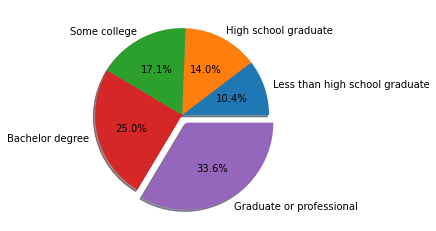

In [7]:
X = education_data["Less than high school graduate"].mean()
Y = education_data["High school graduate"].mean()
Z = education_data["Some college"].mean()
B = education_data["Bachelor degree"].mean()
G = education_data["Graduate or professional"].mean()
Labels = ["Less than high school graduate","High school graduate","Some college","Bachelor degree","Graduate or professional"]
Median = [X,Y,Z,B,G]
explode = (0, 0, 0, 0, 0.1)
plt.pie(Median, labels=Labels, autopct="%1.1f%%",explode=explode, shadow=True)
plt.savefig("MedianEarningsVseducation.png")
plt.show()

In [8]:
#Santa Clara (37.35, -121.95), San Francisco(37.77, -122.43), Marin county(38.08, -122.76), San Mateo county(37.43,122.40)
# Contra Costa County(37.85, -121.90)
# Create a list containing coordinates
coordinates = [
    {"name":"Santa Clara County", "location": (37.35, -121.95), "Median_Income":"$116,178"},
    {"name":"San Francisco County", "location": (37.77, -122.43), "Median_Income":"$104,552"},
    {"name":"Marin County", "location": (38.08, -122.76), "Median_Income":"$110,217"},
    {"name":"San Mateo County", "location": (37.43, -122.40), "Median_Income":"$113,776"},
    {"name":"Contra Costa County", "location": (37.85, -121.90), "Median_Income":"$93,712"},
]
county_location = [county['location'] for county in coordinates]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Median Income</dt><dd>{Median_Income}</dd>
</dl>
"""
county_info = [info_box_template.format(**county) for county in coordinates]

marker_layer = gmaps.marker_layer(county_location, info_box_content=county_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))